# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# import numpy and pandas
import pandas as pd
import numpy as np

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents.

In [2]:
# Your code here:
data=pd.read_csv("Current_Employee_Names__Salaries__and_Position_Titles.csv")

Examine the `salaries` dataset using the `head` function below.

In [35]:
# Your code here:
data.head()


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [4]:
# Your code here:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               33183 non-null  object 
 1   Job Titles         33183 non-null  object 
 2   Department         33183 non-null  object 
 3   Full or Part-Time  33183 non-null  object 
 4   Salary or Hourly   33183 non-null  object 
 5   Typical Hours      8022 non-null   float64
 6   Annual Salary      25161 non-null  float64
 7   Hourly Rate        8022 non-null   float64
dtypes: float64(3), object(5)
memory usage: 2.0+ MB


Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [5]:
# Your code here:
print("Salary =",(data[data["Salary or Hourly"]=="Salary"]).shape[0])
print("Hourly =",(data[data["Salary or Hourly"]=="Hourly"]).shape[0])


Salary = 25161
Hourly = 8022


What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [6]:
# Your code here:

data.groupby(by="Department").count()["Name"]

Department
ADMIN HEARNG                39
ANIMAL CONTRL               81
AVIATION                  1629
BOARD OF ELECTION          107
BOARD OF ETHICS              8
BUDGET & MGMT               46
BUILDINGS                  269
BUSINESS AFFAIRS           171
CITY CLERK                  84
CITY COUNCIL               411
COMMUNITY DEVELOPMENT      207
COPA                       116
CULTURAL AFFAIRS            65
DISABILITIES                28
DoIT                        99
FAMILY & SUPPORT           615
FINANCE                    560
FIRE                      4641
GENERAL SERVICES           980
HEALTH                     488
HUMAN RELATIONS             16
HUMAN RESOURCES             79
INSPECTOR GEN               87
LAW                        407
LICENSE APPL COMM            1
MAYOR'S OFFICE              85
OEMC                      2102
POLICE                   13414
POLICE BOARD                 2
PROCUREMENT                 92
PUBLIC LIBRARY            1015
STREETS & SAN             21

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [39]:
# Your code here:
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind
import scipy.stats as stats

alpha=0.05
H_0=30

sample=data["Hourly Rate"].dropna()

print(ttest_1samp(sample,H_0)[1])

#We reject the H_0 hypothesis because pvalue < alpha
#The probability of this hypothesis (i.e. having a 30$/h) is very very low. close to 0. REJECTED!

4.3230240486229894e-92


In [8]:
"""plt.hist(data["Hourly Rate"],bins=60)
plt.show()
print("mean", data["Hourly Rate"].mean())
print("std",data["Hourly Rate"].std())

normal=stats.norm(data["Hourly Rate"].mean(),data["Hourly Rate"].std())

x=normal.rvs(1000)
plt.plot(x,normal.pdf(x))


#data["Hourly Rate"].index

((data[(data["Hourly Rate"]>29) & (data["Hourly Rate"]<31)]))"""

"""mu = data["Hourly Rate"].mean()
sigma = data["Hourly Rate"].std()
x1 = 0
x2 = 1000
# calculate the z-transform
z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma
x = np.arange(z1, z2) # range of x in spec
# mean = 0, stddev = 1, since Z-transform was calculated
y = stats.norm.pdf(x,data["Hourly Rate"].mean(),data["Hourly Rate"].std())

plt.plot(x,y)
#plt.twinx() 
#plt.hist(data["Hourly Rate"],bins=60)
plt.show()"""

'mu = data["Hourly Rate"].mean()\nsigma = data["Hourly Rate"].std()\nx1 = 0\nx2 = 1000\n# calculate the z-transform\nz1 = ( x1 - mu ) / sigma\nz2 = ( x2 - mu ) / sigma\nx = np.arange(z1, z2) # range of x in spec\n# mean = 0, stddev = 1, since Z-transform was calculated\ny = stats.norm.pdf(x,data["Hourly Rate"].mean(),data["Hourly Rate"].std())\n\nplt.plot(x,y)\n#plt.twinx() \n#plt.hist(data["Hourly Rate"],bins=60)\nplt.show()'

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

pvalue 0.0010301701775482569
86486.41450313339


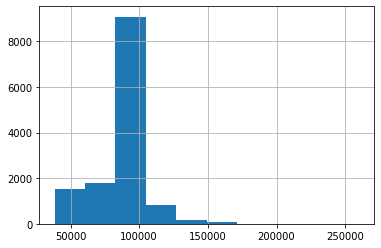

In [43]:
alpha=0.05
H_0=86000

sample=data[(data["Department"] =="POLICE")]["Annual Salary"].dropna()

print("pvalue", ttest_1samp(sample,H_0)[1]/2)

data[(data["Department"] =="POLICE")]["Annual Salary"].hist()

#print(data[(data["Department"] =="POLICE")]["Annual Salary"].mean())

#We reject the H_0 hypothesis because pvalue < alpha
#The probability of this hypothesis (i.e. having a 86000$) is very very low. close to 0. REJECTED!

Using the `crosstab` function, find the department that has the most hourly workers. 

In [10]:
most_h_workers=pd.crosstab(data["Department"],data["Salary or Hourly"])

depart=most_h_workers[most_h_workers["Hourly"]== most_h_workers["Hourly"].max()].reset_index()

print(depart["Department"].values, "is the department that has the most hourly workers")

['STREETS & SAN'] is the department that has the most hourly workers


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [11]:
alpha=0.05
H_0=35

sample=data[(data["Department"] =="STREETS & SAN")]["Hourly Rate"].dropna()

print("pvalue", ttest_1samp(sample,H_0)[1])

pvalue 3.3378530564707717e-21


# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [36]:
# Your code here:

import scipy.stats as stats

confidence_interval=0.95
df=data[data["Salary or Hourly"]=="Hourly"]["Hourly Rate"].count()-1

loc=data[data["Salary or Hourly"]=="Hourly"]["Hourly Rate"].mean()  #mean

std_error=stats.sem(data[data["Salary or Hourly"]=="Hourly"]["Hourly Rate"],ddof=df)  

dist=stats.t(df, loc, std_error)

dist.interval(confidence_interval)

(9.04624854199498, 56.53086689056758)

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [13]:
# Your code here:
confidence_interval=0.95 #
dataseries=data[(data["Department"] =="POLICE")&(data["Salary or Hourly"]=="Salary")]["Annual Salary"]

df=dataseries.count()-1

loc=dataseries.mean()  #mean

std_error=stats.sem(dataseries,ddof=df)  #std

dist=stats.t(df, loc, std_error)

dist.interval(confidence_interval)

(50671.60678895816, 122301.22221730862)

# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [14]:
# Your code here:

